# Project: Investigate TMDb_MovieData Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing data associated with imdb movie reviews from the year 1960 to 2015. In particular we will be looking at how the popularity of various genres have changed over time. Further we will be investigating the various attributes which make a movie successful. Is it possible to predict the success of a movie before its released? How has the runtime of movies varied? These are some of the questions we look to answer.

Dataset Link:
https://www.kaggle.com/tmdb/tmdb-movie-metadata/data



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Questions:

<ul>
<li><a href="#question1">1.   Which genres have been successful over the years?</a></li>
<li><a href="#question2">2.   What are the attributes of a successful movie?</a></li>
<li><a href="#question3">3.   How has runtime of movies changed over the years?</a></li>
<li><a href="#question4">4.   What is the relation between vote count and rating?</a></li>
<li><a href="#question5">5.   What keywords have trended over the years?</a></li>








<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

Load Dataset into Dataframe

In [0]:
df = pd.read_csv('tmdb-movies.csv')

In [0]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [0]:
shape = df.shape
print(f"Dataset, rows: {shape[0]} cols: {shape[1]}")

Dataset, rows: 10866 cols: 21


In [0]:
print("Concise Summary of DataFrame\n")
print(df.info())

Concise Summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   ob

In [0]:
print(f"Range of years in dataset: {df['release_year'].min()} to {df['release_year'].max()}")

Range of years in dataset: 1960 to 2015


In [0]:
print("Descriptive Statistics")
print(df[['popularity','budget', 'revenue','runtime', 'vote_count']].describe())

Descriptive Statistics
         popularity        budget       revenue       runtime    vote_count
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000


In [0]:
print(df[['vote_average','release_year', 'budget_adj', 'revenue_adj']].describe())

       vote_average  release_year    budget_adj   revenue_adj
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07
std        0.935142     12.812941  3.430616e+07  1.446325e+08
min        1.500000   1960.000000  0.000000e+00  0.000000e+00
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07
max        9.200000   2015.000000  4.250000e+08  2.827124e+09


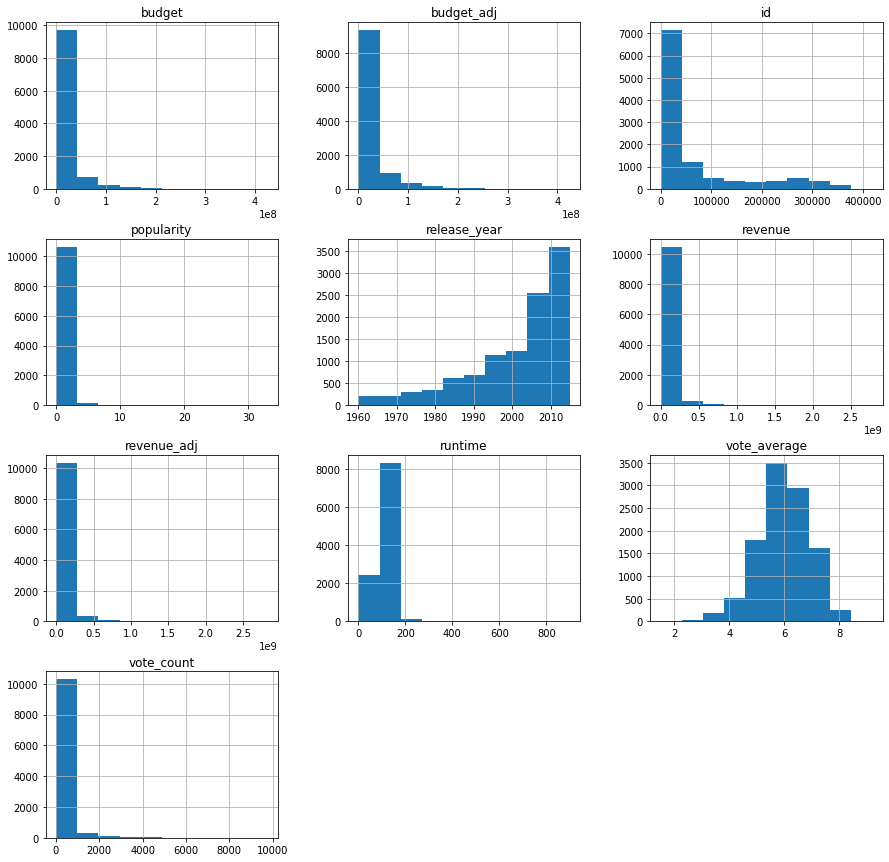

In [0]:
df.hist(figsize=(15,15));

In [0]:
print("Number of unique values in each column")
print(df.nunique())

Number of unique values in each column
id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### **Data Cleaning**

Our Goal here is to find the potentially unreasonable data values, unnecessary variables for my posed research questions, null data or duplicates, and then make data clearing decisions based on remaining data.


### 1. Drop unwanted columns

We begin the cleanup effort by dropping the columns which are irrelevant to the analysis process. These are:


*   imdb_id
*   homepage
*   tagline
*   overview
*   release_date



In [0]:
columns_to_drop = ['imdb_id', 'homepage', 'tagline', 'overview', 'release_date']
df.drop(columns=columns_to_drop, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


### 2. Drop rows with some columns containing null value

There are few string columns such as director, cast and genres that have null values in small number hence its safe to drop these rows 

In [0]:
print("Checking Null values in columns: ")
df.isnull().sum()

Checking Null values in columns: 


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [0]:
shape = df.shape
print(f"Dataset orignally, rows: {shape[0]} cols: {shape[1]}")
df.dropna(subset=['cast', 'director', 'genres'], axis=0, inplace=True)
shape = df.shape
print(f"Dataset after dropping NaN, rows: {shape[0]} cols: {shape[1]}")

Dataset orignally, rows: 10866 cols: 16
Dataset after dropping NaN, rows: 10732 cols: 16


### 3. Drop duplicate rows
We can also go ahead and drop any duplicate rows

In [0]:
print(f"Number of duplicate rows: {sum(df.duplicated())}")
df.drop_duplicates(inplace=True)
shape = df.shape
print(f"Dataset after dropping duplicates, rows: {shape[0]} cols: {shape[1]}")

Number of duplicate rows: 1
Dataset after dropping duplicates, rows: 10731 cols: 16


### 4. Fix numerical columns with 0 values 

Next, for the purpose of numerical anlysis it is important to have complete and accurate data. Description of the dataframe along with the histograms highlighted that budget, revenue, budget_adj, revenue_adj have values of zero for each of these columns. While we are at it we can drop rows containing runtime value of zero as well. 

We acheive this by setting all the zero's to NaN and then dropping all rows with NaN's

First lets have a look at how many rows have a zero in each of these columns

In [0]:
columns_zero = ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime']
for column in columns_zero:
  print(f"Number of zero rows in {column}: {df.groupby([column]).count()['id'].head(1)[0]}")

Number of zero rows in budget: 5578
Number of zero rows in revenue: 5888
Number of zero rows in budget_adj: 5578
Number of zero rows in revenue_adj: 5888
Number of zero rows in runtime: 28


Looks like there are many rows containing zero budget or revenue. It wouldnt make sense to drop them all, hence we set the zero to NaN and move on. 

We can drop the runtime rows containing a value of zero hence they are small

In [0]:
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)

df['budget_adj'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)

# this should filter the data in place 
df.query('runtime !=0', inplace=True) 

#df.dropna(axis=0, inplace=True)
shape = df.shape
print(f"Dataset after dropping runtime, rows: {shape[0]} cols: {shape[1]}")

Dataset after dropping runtime, rows: 10703 cols: 16


### 5. Split all the columns containing seperator '|'

At a first glance of the columns, something that stood out was the content in the following columns being seperated by "|":

*   cast
*   keywords
*   genres
*   production_companies

There are two options here. We could choose to proceed with the columns as is or we could split them each into its own column.

For the purpose of this analysis we split them into their respective seperate columns

In [0]:
def split_rename(df, column_name):
  return (df[column_name].str.split('|', expand=True).rename(columns=lambda x: f"{column_name}_{x+1}"))

In [0]:
df_cast = split_rename(df, 'cast')
df_keywords = split_rename(df, 'keywords')
df_genres = split_rename(df, 'genres')
df_production = split_rename(df, 'production_companies')

In [0]:
df_genres.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


Adding the new columns to the dataset and dropping the previous ones

In [0]:
df = df.join([df_cast, df_keywords, df_genres, df_production])
df = df.drop(['cast', 'keywords', 'genres', 'production_companies'], axis=1)

### Here is a summary of the clean dataset:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10703 non-null  int64  
 1   popularity              10703 non-null  float64
 2   budget                  5150 non-null   float64
 3   revenue                 4843 non-null   float64
 4   original_title          10703 non-null  object 
 5   director                10703 non-null  object 
 6   runtime                 10703 non-null  int64  
 7   vote_count              10703 non-null  int64  
 8   vote_average            10703 non-null  float64
 9   release_year            10703 non-null  int64  
 10  budget_adj              5150 non-null   float64
 11  revenue_adj             4843 non-null   float64
 12  cast_1                  10703 non-null  object 
 13  cast_2                  10568 non-null  object 
 14  cast_3                  10484 non-null

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Research question 1: Which genres have been successful over the years?

In [0]:
# First we will create a column for profit 
df.insert(4,'profit',df['revenue']-df['budget'])
df.head(1)

,id,popularity,budget,revenue,profit,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,monster,dna,tyrannosaurus rex,velociraptor,island,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


count    3.849000e+03
mean     7.056595e+07
std      1.506990e+08
min     -4.139124e+08
25%     -1.312284e+06
50%      2.014450e+07
75%      8.198066e+07
max      2.544506e+09
Name: profit, dtype: float64


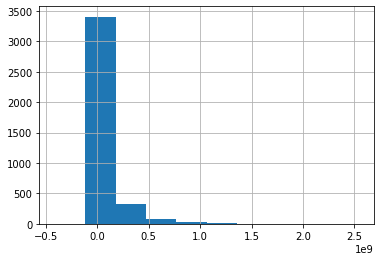

In [0]:
print(df['profit'].describe())
df['profit'].hist()

In [0]:
# lets find all movies which made a profit of 
df_profitable_movies = df.query('profit > 50000000')
print(f"There are {df_profitable_movies.shape[0]} profitable movies")
df_profitable_movies.head()


There are 1338 profitable movies


,id,popularity,budget,revenue,profit,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,monster,dna,tyrannosaurus rex,velociraptor,island,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,future,chase,post-apocalyptic,dystopia,australia,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Robert Schwentke,119,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,based on novel,revolution,dystopia,sequel,dystopic future,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,android,spaceship,jedi,space opera,3d,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,car race,speed,revenge,suspense,car,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [0]:
# looking at the genre 
df_genres = df_profitable_movies.loc[:, 'genres_1': 'genres_5' ]

In [0]:
genre_counts = df_genres.stack().value_counts()

In [0]:
#genre_counts = series1.value_counts()+series2.value_counts()+series3.value_counts()+series4.value_counts()+series5.value_counts()
print("Here are the top 5 Genres:")
print(genre_counts.head(5))

Here are the top 5 Genres:
Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64


In [0]:
genre_counts.dropna(inplace=True)

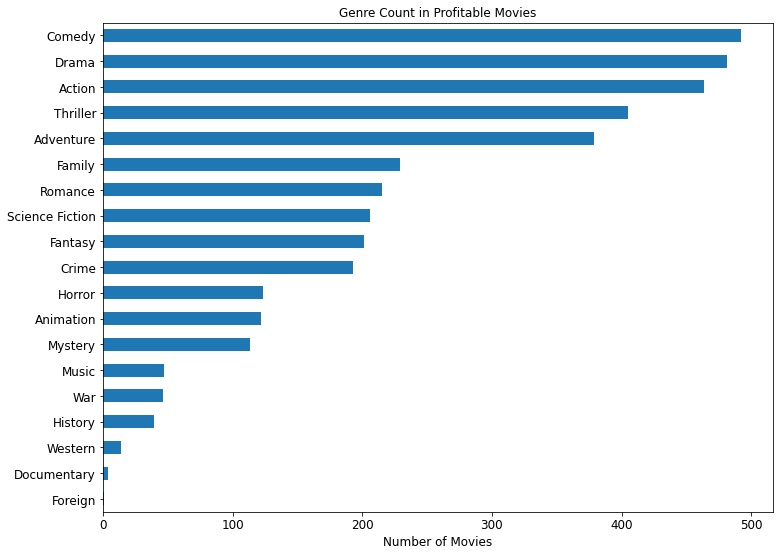

In [0]:
genre_counts.sort_values(ascending=True, inplace=True)
p = genre_counts.plot.barh(fontsize=12)
p.set(title = 'Genre Count in Profitable Movies')
p.set_xlabel('Number of Movies', fontsize=12)
p.figure.set_size_inches(12, 9)

Above analysis shows that the comedy genre was most successful over the years followed closely by drama and action

<a id='question2'></a>
### Research question 2: What are the attributes associated with succesful movies?

In [0]:
# lets take a look at profit column within profitable movies
df_profitable_movies['profit'].describe()

count    1.338000e+03
mean     1.945127e+08
std      2.019087e+08
min      5.002009e+07
25%      7.712958e+07
50%      1.240835e+08
75%      2.285696e+08
max      2.544506e+09
Name: profit, dtype: float64

In [0]:
# search for the best attributes first
best_director = df_profitable_movies['director'].value_counts().idxmax()
cast = df_profitable_movies.loc[:, 'cast_1': 'cast_5']
best_cast = cast.stack().value_counts().idxmax()
genres = df_profitable_movies.loc[:, 'genres_1': 'genres_5']
best_genres = genres.stack().value_counts().idxmax()
production = df_profitable_movies.loc[:, 'production_companies_1': 'production_companies_5']
best_production = production.stack().value_counts().idxmax()
best_year = df_profitable_movies['release_year'].value_counts().idxmax()

In [0]:
# search for the average attributes
avg_runtime = df_profitable_movies['runtime'].mean()
avg_budget = df_profitable_movies['budget_adj'].mean()
avg_revenue = df_profitable_movies['revenue_adj'].mean()
avg_profit = df_profitable_movies['profit'].mean()
avg_vote = df_profitable_movies['vote_average'].mean()
avg_popularity = df_profitable_movies['popularity'].mean()

In [0]:
# print results
print("Attributes of a Successful Movie")
print("================================")
print(f"Director: {best_director}")
print(f"Cast: {best_cast}")
print(f"Genres: {best_genres}")
print(f"Production company: {best_production}")
print(f"Year: {best_year}")
print(f"Average runtime: {avg_runtime:.0f} mins")
print(f"Average budget: {avg_budget/1000000:.1f} M")
print(f"Average revenue: {avg_revenue/1000000:.1f} M")
print(f"Average profit: {avg_profit/1000000:.1f} M")
print(f"Average vote: {avg_vote:.1f}")
print(f"Average popularity: {avg_popularity:.1f}")

Attributes of a Successful Movie
Director: Steven Spielberg
Cast: Tom Cruise
Genres: Comedy
Production company: Universal Pictures
Year: 2011
Average runtime: 114 mins
Average budget: 68.9 M
Average revenue: 318.1 M
Average profit: 194.5 M
Average vote: 6.4
Average popularity: 2.0


<a id='question3'></a>
### Research Question 3: How has runtime of movies changed over the years?

In [0]:
df['runtime'].describe()

count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [0]:
print(f"Min runtime of a movie is {df['runtime'].min():.0f} mins")
print(f"Average runtime of a movie is {df['runtime'].mean():.0f} mins")
print(f"Max runtime of a movie is {df['runtime'].max():.0f} mins")

Min runtime of a movie is 3 mins
Average runtime of a movie is 103 mins
Max runtime of a movie is 900 mins


In [0]:
runtime_counts = df['runtime'].value_counts()
print(f"Most common runtime of a movie is {runtime_counts.index[0]} mins")

Most common runtime of a movie is 90 mins


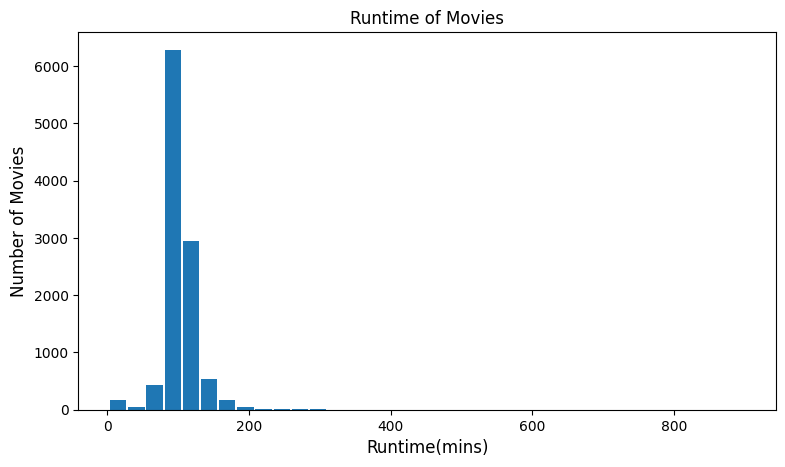

In [0]:
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime(mins)', fontsize = 12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Runtime of Movies', fontsize=12)
plt.hist(df['runtime'], rwidth = 0.9, bins =35);

The distribution above is skewed to the right and it seems like most movies range between 50 to 150 mins

it would be intresting to see how many movies are exceeding 400 min and below 20 mins. This can be visualized using a swarm point plot

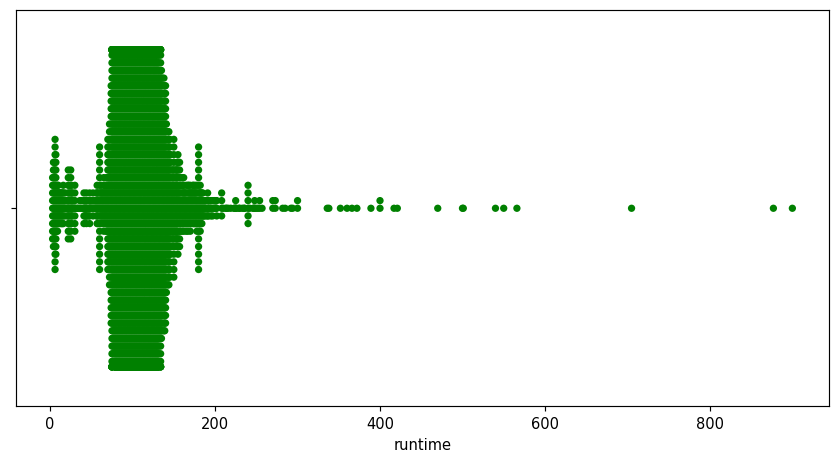

In [0]:
plt.figure(figsize=(10,5), dpi = 105)
sns.swarmplot(df['runtime'], color = 'green')

<a id='question4'></a>
### Research question 4: What is the relation between vote count and rating?

In [0]:
# Lets being with creating a new dataframe with just the columns we care about 
df_vote = df.loc[:, 'vote_count' : 'vote_average']
df_vote.describe()

,vote_count,vote_average
count,10703.000000,10703.000000
mean,220.333178,5.966112
std,579.481969,0.930155
min,10.000000,1.500000
25%,17.000000,5.400000
50%,39.000000,6.000000
75%,149.000000,6.600000
max,9767.000000,9.200000


              vote_count  vote_average
vote_count       1.00000       0.26044
vote_average     0.26044       1.00000


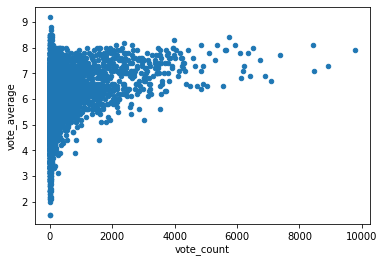

In [0]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
print(df_vote.corr())

              vote_count  vote_average
vote_count      1.000000      0.323968
vote_average    0.323968      1.000000


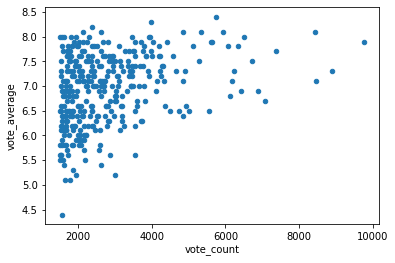

In [0]:
# we probably want to consider cases with high vote count and compare 
df_high_votes = df_vote.query('vote_count > 1500')
print(df_high_votes.corr())
df_high_votes.plot(x='vote_count', y='vote_average', kind='scatter');

<a id='question5'></a>
### Research question 5: What keywords have trended over the years?

In [0]:
movie_count = df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Text(0, 0.5, 'Number of movies')

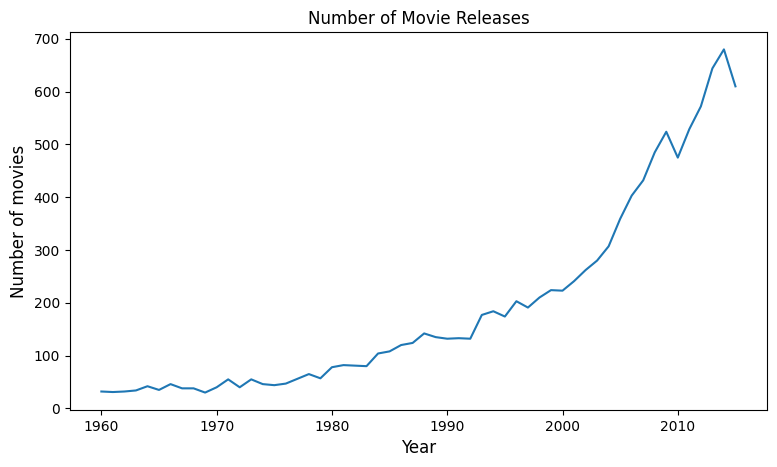

In [0]:
plt.figure(figsize=(9,5), dpi = 100)
plt.plot(movie_count.index,movie_count)
plt.title('Number of Movie Releases')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)

In [0]:
# now we need to create an array of years 
df_year = df['release_year'].unique()
df_year.sort()
df_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [0]:
df_decades = []
# Now we can group by decades 
df_1960s =df_year[:10]
df_decades.append([df_1960s, '1960s'])
df_1970s =df_year[10:20]
df_decades.append([df_1970s, '1970s'])
df_1980s =df_year[20:30]
df_decades.append([df_1980s, '1980s'])
df_1990s = df_year[30:40]
df_decades.append([df_1990s, '1990s'])
df_2000s = df_year[40:]
df_decades.append([df_2000s, '2000s'])

In [0]:
# For each decade now we find the most common keyword 
df_keywords = pd.DataFrame()
for i, decade in enumerate(df_decades):
  df_temp = df[df.release_year.isin(decade[0])]
  keyword = df_temp.loc[:, 'keywords_1': 'keywords_5']
  common_keyword = keyword.stack().value_counts().idxmax()
  common_keyword_count = keyword.stack().value_counts()[common_keyword]
  df_keywords = df_keywords.append(pd.DataFrame({'year' :decade[1],'keyword':common_keyword,'keyword_count': common_keyword_count}, index=[i]))
  print(f"{decade[1]}: {common_keyword} {common_keyword_count}")


1960s: based on novel 16
1970s: based on novel 23
1980s: nudity 39
1990s: independent film 80
2000s: woman director 347


In [0]:
df_keywords

,year,keyword,keyword_count
0,1960s,based on novel,16
1,1970s,based on novel,23
2,1980s,nudity,39
3,1990s,independent film,80
4,2000s,woman director,347


Text(0, 0.5, 'keywords')

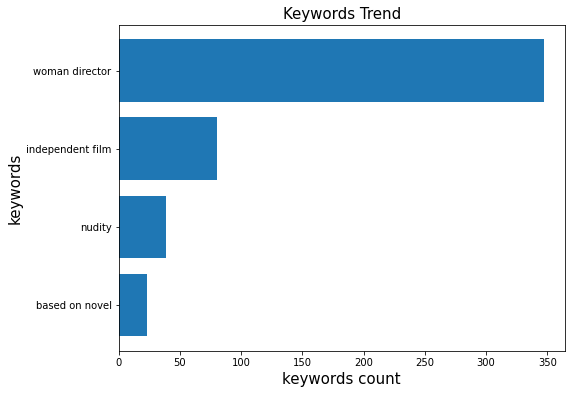

In [0]:
# visualizing the same
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.barh(df_keywords['keyword'],df_keywords['keyword_count'],)
ax.set_title('Keywords Trend', fontsize=15)
ax.set_xlabel('keywords count', fontsize=15)
ax.set_ylabel('keywords', fontsize=15)

<a id='conclusions'></a>
## Conclusions

To conclude this research lets summarize the findings. The goal of this research was to explore a dataset comprising of last 45 years of various movie attributes. There were 5 questions which were posed and here are the findings:

1. Which genres have been successful over the years?

> The comedy genre was most successful over the years followed closely by drama and action.

2. What are the attributes associated with succesful movies?

> There are few cast, director, genre and production company that seldomly showed up in movies that were a financial success. It was also found that most successful movies made a profit of about 195 million and had an average vote of 6.4

3. How has runtime of movies changed over the years?

> It was found that most movies had a runtime of 103 minutes, with 25% being in the 90 minutes timeframe and 75% in 122 minutes timeframe.

4. What is the relation between vote count and rating?

> Upon analysis of data it was found that movies with a higher vote average did not directly relate to number of votes it received 

5. What keywords have trended over the years?

> 1960's and 1970's had the same keyword trending "based on novel". Thereafter the keyword for next decade is "nudity" in 1980s followed by "independent film" in 1990s and "feature women director" in 2000s

The dataset is quite intresting and there were few unexpected findings as well as others which confirmed our assumptions. 

There are a few limitations of this analysis for example when considering movies to be profitable I assumed the threshold to be 50 million but this may not be accurate which may affect the reported findings. Further the data is only as recent as 2013 which maybe outdated and the trends may have shifted since then.

The results disclosed above are strictly based on the dataset and the analysis is generalized.